In [1]:
!wget http://t.dripemail2.com/c/eyJhY2NvdW50X2lkIjoiNDc2ODQyOSIsImRlbGl2ZXJ5X2lkIjoiMzY2MDc5MDY4MSIsInVybCI6Imh0dHA6Ly9weWltZy5jby9tYnZkaz9fX3M9aGhvaXpqZ2dlcXpwM2N3Z3FpanYifQ


Redirecting output to ‘wget-log.1’.


In [0]:
!unzip eyJhY2NvdW50X2lkIjoiNDc2ODQyOSIsImRlbGl2ZXJ5X2lkIjoiMzY2MDc5MDY4MSIsInVybCI6Imh0dHA6Ly9weWltZy5jby9tYnZkaz9fX3M9aGhvaXpqZ2dlcXpwM2N3Z3FpanYifQ

In [0]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
import numpy as np
import random
import cv2
import os
import glob

In [0]:
class MiniVGGNet:
	@staticmethod
	def build(width, height, depth, classes):
		model = Sequential()
		inputShape = (height, width, depth)
		chanDim = -1

		if K.image_data_format() == 'channels_first':
			inputShape = (depth, height, width)
			chanDim = 1
		model.add(Conv2D(32, (3, 3), padding = 'same', input_shape=inputShape))
		model.add(Activation('relu'))
		model.add(BatchNormalization(axis = chanDim))
		model.add(MaxPooling2D(pool_size = (2, 2)))
		model.add(Dropout(0.25))
		model.add(Conv2D(64, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis = chanDim))
		model.add(Conv2D(64, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.25))
		model.add(Conv2D(128, (3, 3), padding = "same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(Conv2D(128, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(Conv2D(128, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.25))
		model.add(Flatten())
		model.add(Dense(512))
		model.add(Activation("relu"))
		model.add(BatchNormalization())
		model.add(Dropout(0.5))
		model.add(Dense(classes))
		model.add(Activation("softmax"))

		return model


In [0]:
data_path = '/content/keras-tutorial/animals/*'

In [0]:
data = []
labels = []

paths = glob.glob(data_path)
image_paths = []

random.seed(42)

for path in paths:
    sub_paths = glob.glob(os.path.sep.join([path, '*']))
    for i in sub_paths:
        image_paths.append(i)

random.shuffle(image_paths)

for path in image_paths:
    image = cv2.imread(path)
    image = cv2.resize(image, (64, 64))
    data.append(image)
    
    label = path.split(os.path.sep)[-2]
    labels.append(label)

data = np.array(data, dtype = np.float64) / 255
labels = np.array(labels)

In [0]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=42)

In [0]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [0]:
aug = ImageDataGenerator(rotation_range = 30, width_shift_range = 0.1, height_shift_range = 0.1, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True, fill_mode = "nearest")
model = MiniVGGNet.build(width = 64, height = 64, depth = 3, classes = len(lb.classes_))

In [0]:
INIT_LR = 0.01
EPOCHS = 100
BS = 32

opt = SGD(lr = INIT_LR, decay = INIT_LR / EPOCHS)
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

In [38]:
H = model.fit_generator(aug.flow(trainX, trainY, batch_size = BS), validation_data = (testX, testY), steps_per_epoch = len(trainX) // BS, epochs = EPOCHS)

Epoch 1/100
70/70 [==============================] - 7s 103ms/step - loss: 1.3447 - acc: 0.5295 - val_loss: 1.2057 - val_acc: 0.5120
Epoch 2/100
70/70 [==============================] - 5s 67ms/step - loss: 1.1071 - acc: 0.5731 - val_loss: 1.9010 - val_acc: 0.3773
Epoch 3/100
70/70 [==============================] - 5s 67ms/step - loss: 0.8987 - acc: 0.6113 - val_loss: 1.1311 - val_acc: 0.5147
Epoch 4/100
70/70 [==============================] - 5s 66ms/step - loss: 0.8328 - acc: 0.6064 - val_loss: 0.7058 - val_acc: 0.6573
Epoch 5/100
70/70 [==============================] - 5s 65ms/step - loss: 0.7676 - acc: 0.6430 - val_loss: 0.7321 - val_acc: 0.6453
Epoch 6/100
70/70 [==============================] - 5s 65ms/step - loss: 0.7640 - acc: 0.6287 - val_loss: 0.7853 - val_acc: 0.6347
Epoch 7/100
70/70 [==============================] - 5s 64ms/step - loss: 0.6845 - acc: 0.6730 - val_loss: 0.7070 - val_acc: 0.6907
Epoch 8/100
70/70 [==============================] - 5s 65ms/step - loss: 0

In [39]:
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis = 1), predictions.argmax(axis = 1), target_names = lb.classes_))

             precision    recall  f1-score   support

       cats       0.66      0.78      0.71       236
       dogs       0.75      0.58      0.65       278
      panda       0.87      0.93      0.90       236

avg / total       0.76      0.75      0.75       750



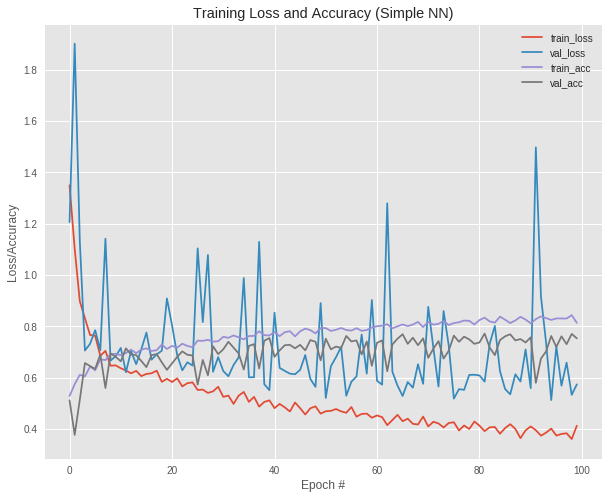

In [41]:
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize = (10, 8))
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["acc"], label="train_acc")
plt.plot(N, H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

[[7.0582613e-02 9.2890382e-01 5.1363924e-04]]
dogs


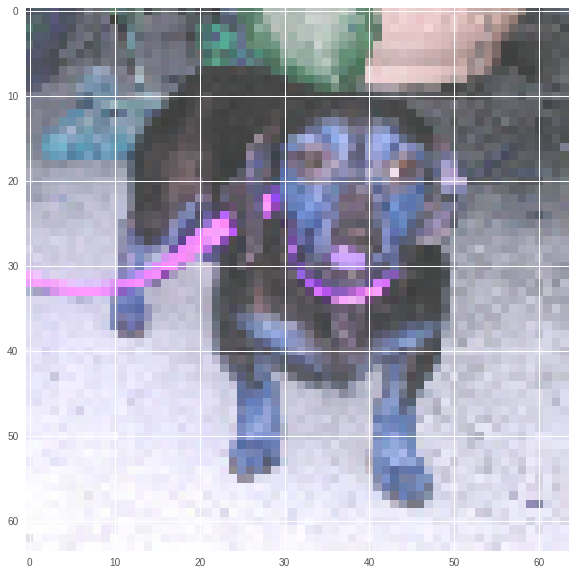

In [53]:
i = 15

pred = model.predict(testX[i].reshape(1, testX[i].shape[0], testX[i].shape[1], testX[i].shape[2]))

res = np.argmax(pred)
print(pred)
print(lb.classes_[res])

plt.figure(figsize = (10, 10))
plt.imshow(testX[i])